### Estadistica - Fitness_analysis - C312
Integrantes:
- David Lezcano Becerra
- Alfredo Nuño Oquendo

In [121]:
import pandas as pd

# Ruta del primer archivo CSV
file_path1 = 'dailyActivity3-4.csv'

# Ruta del segundo archivo CSV
file_path2 = 'dailyActivity4-5.csv'

# Cargar el primer archivo CSV en un DataFrame
df1 = pd.read_csv(file_path1)

# Cargar el segundo archivo CSV en otro DataFrame
df2 = pd.read_csv(file_path2)

# Concatenar df2 al final de df1
df = pd.concat([df1, df2], ignore_index=True)

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance', 'ActivityDate'])

# Suponiendo que 'df' es tu DataFrame
# df = pd.DataFrame(...)

# Identificar las filas donde 'TotalSteps' es igual a 0
rows_to_drop = df[df['TotalSteps'] == 0].index

# Eliminar esas filas del DataFrame
df = df.drop(rows_to_drop)

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()

# Imprimir el array de nombres de columnas
print(column_names)

['Id', 'TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']


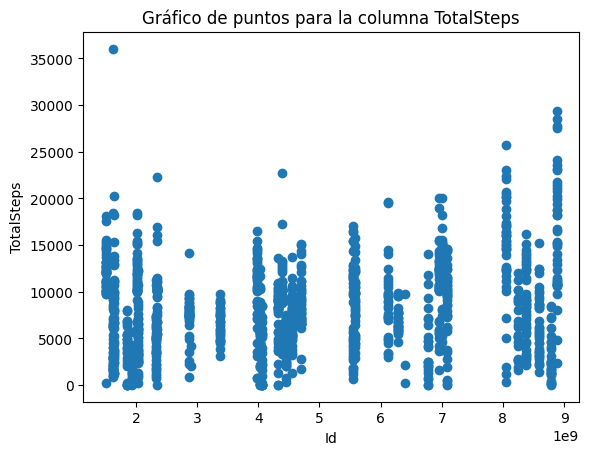

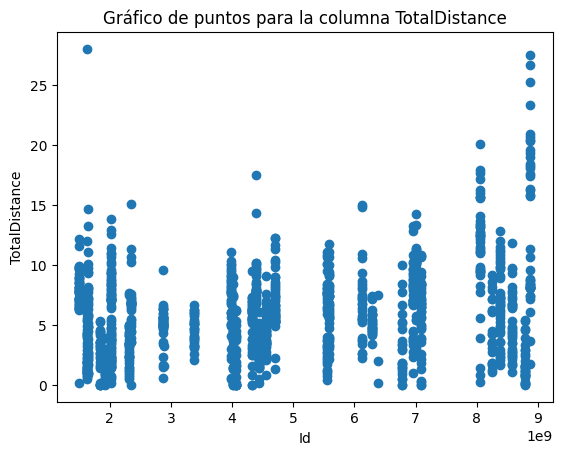

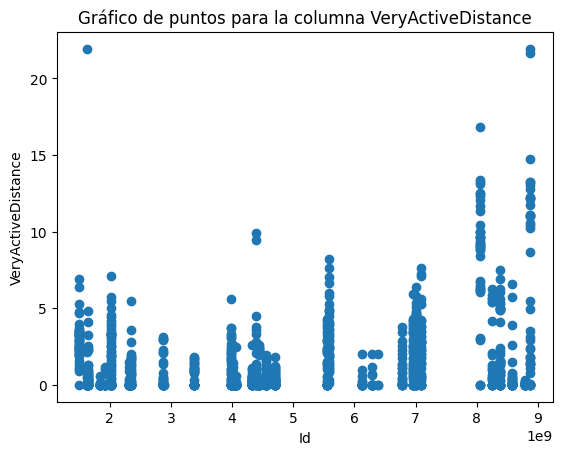

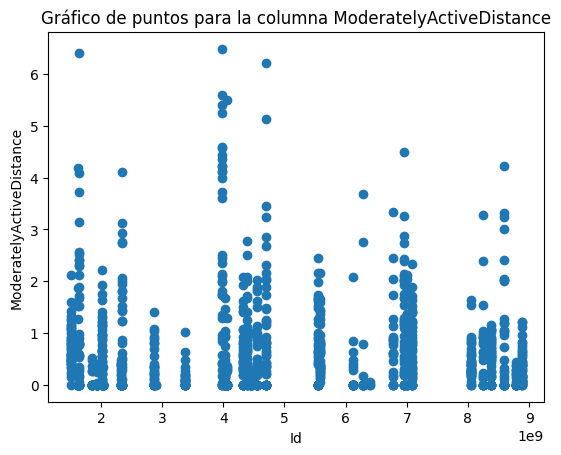

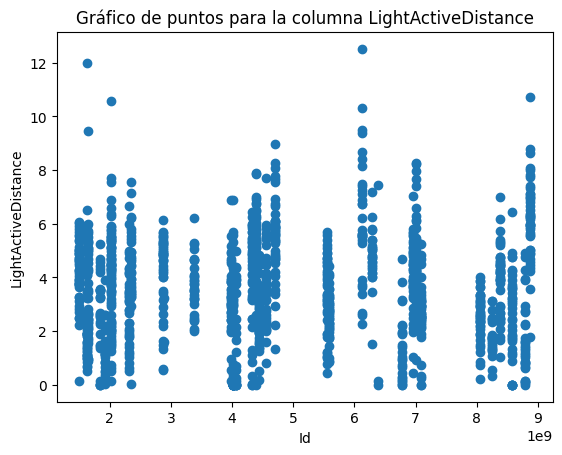

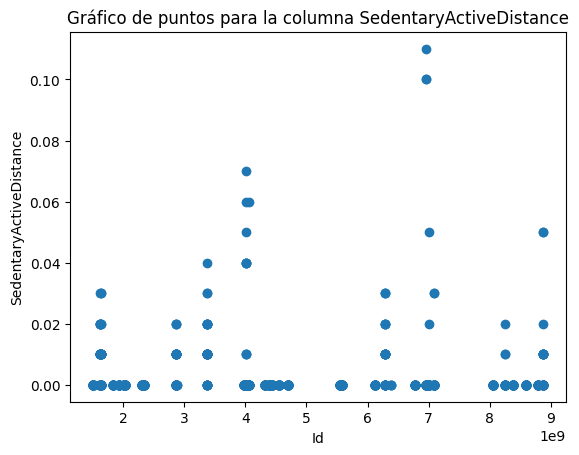

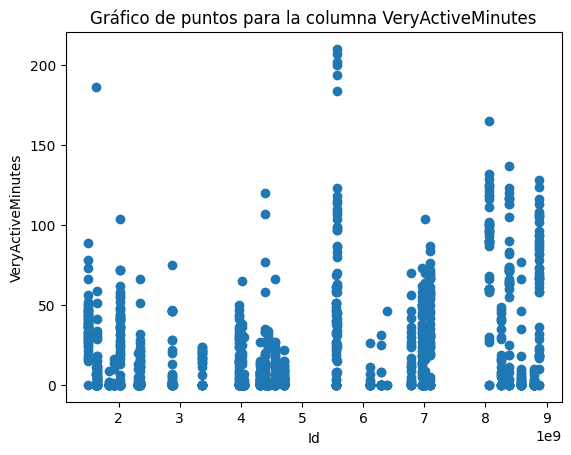

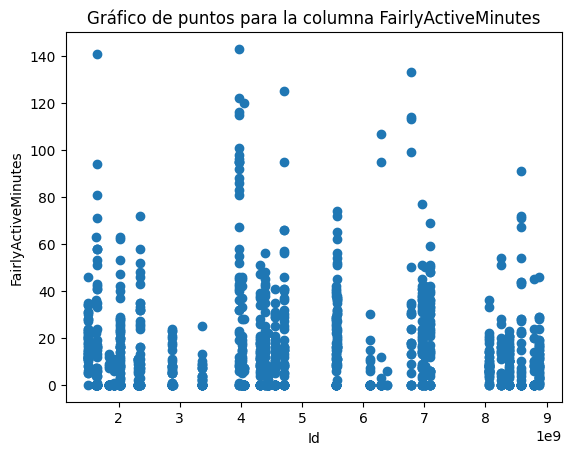

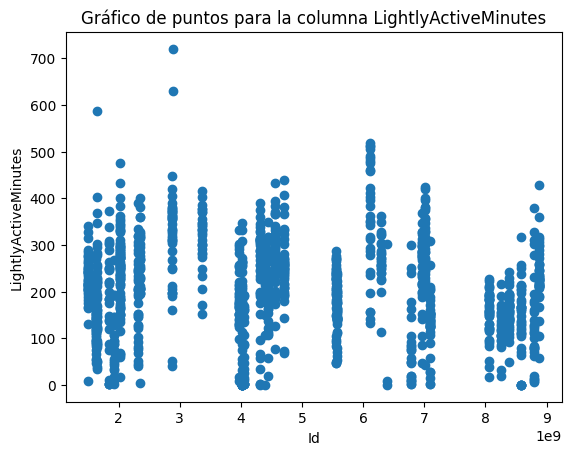

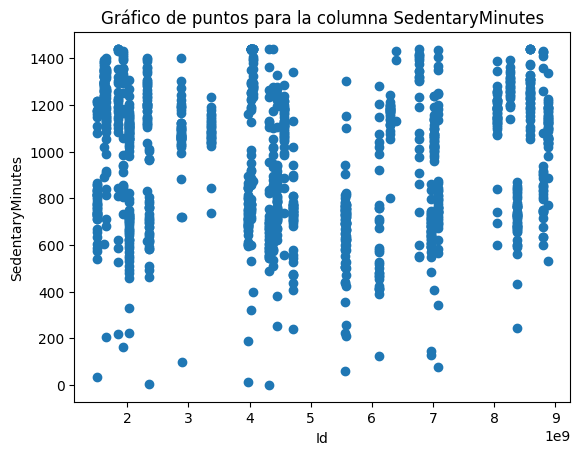

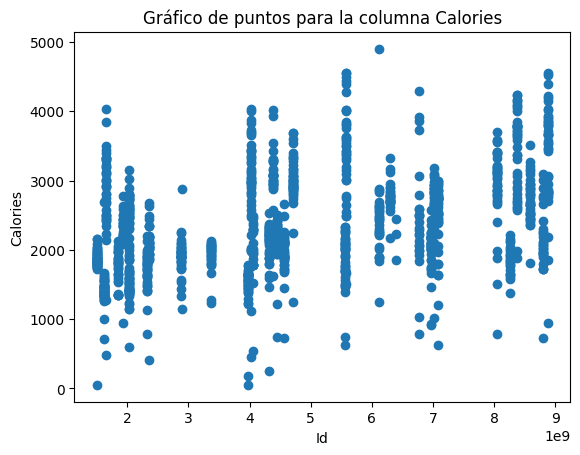

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre cada columna y generar un gráfico de puntos
for column in df.columns:
    if column != 'Id': # Excluir la columna 'Id'
        plt.figure() # Crear una nueva figura para cada gráfico
        plt.scatter(df['Id'], df[column]) # Dibujar el gráfico de puntos
        plt.title(f'Gráfico de puntos para la columna {column}') # Título del gráfico
        plt.xlabel('Id') # Etiqueta del eje x
        plt.ylabel(column) # Etiqueta del eje y
        plt.show() # Mostrar el gráfico

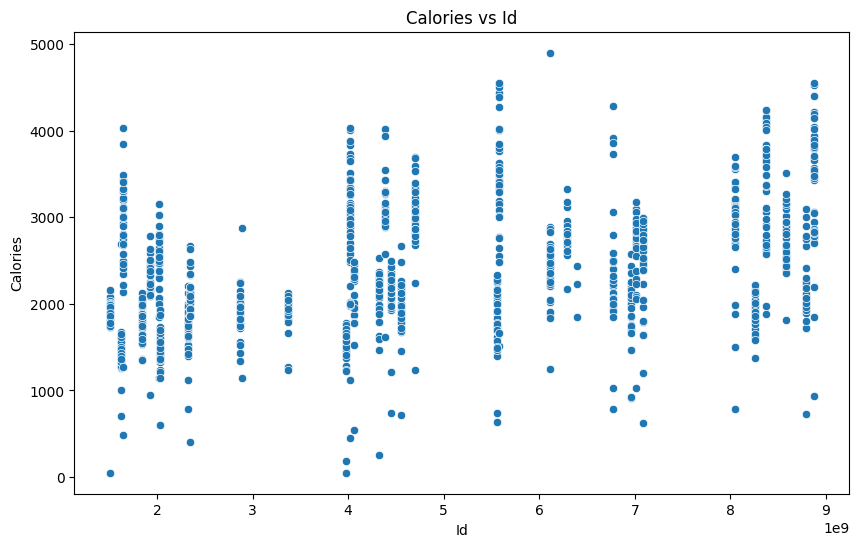

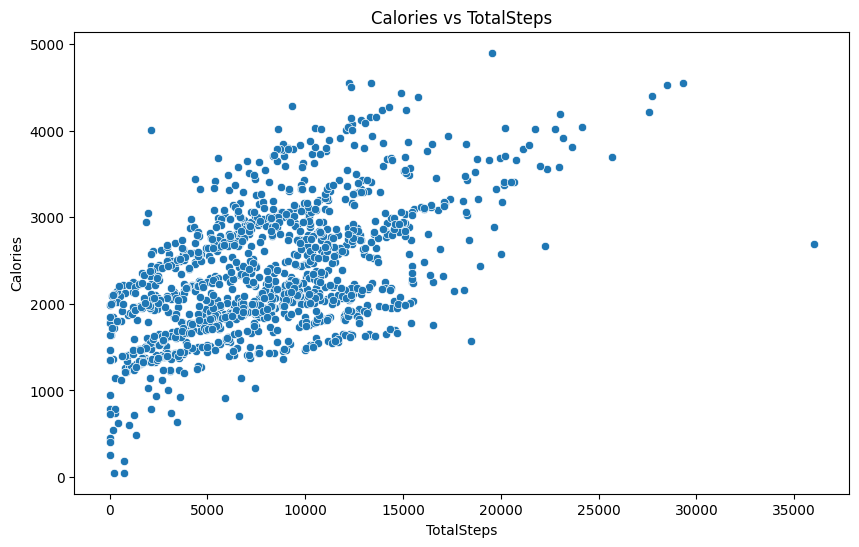

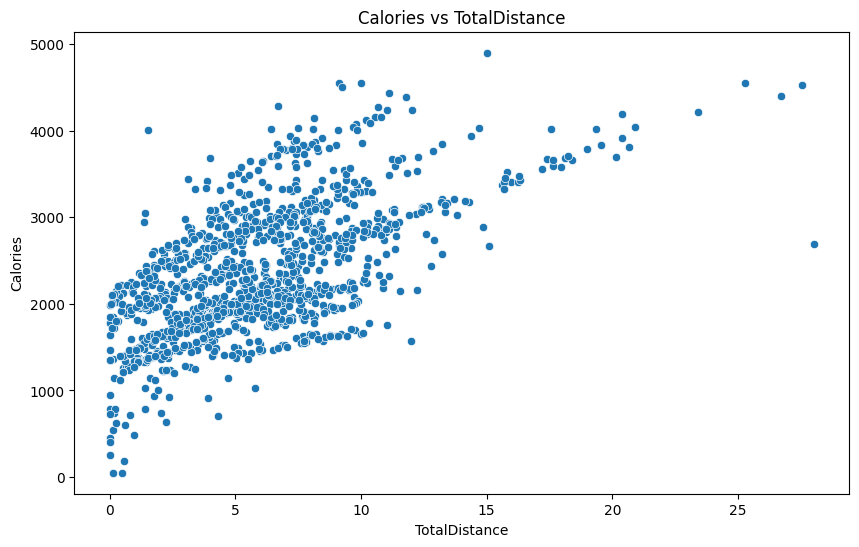

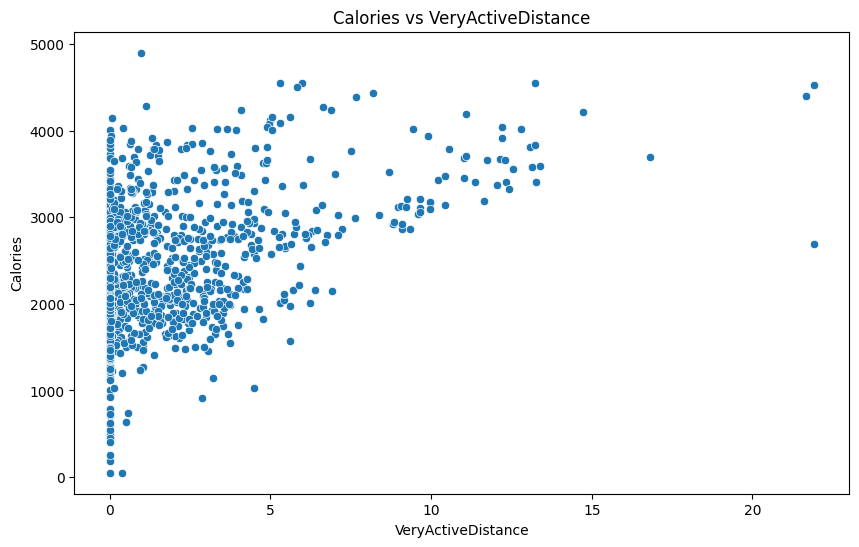

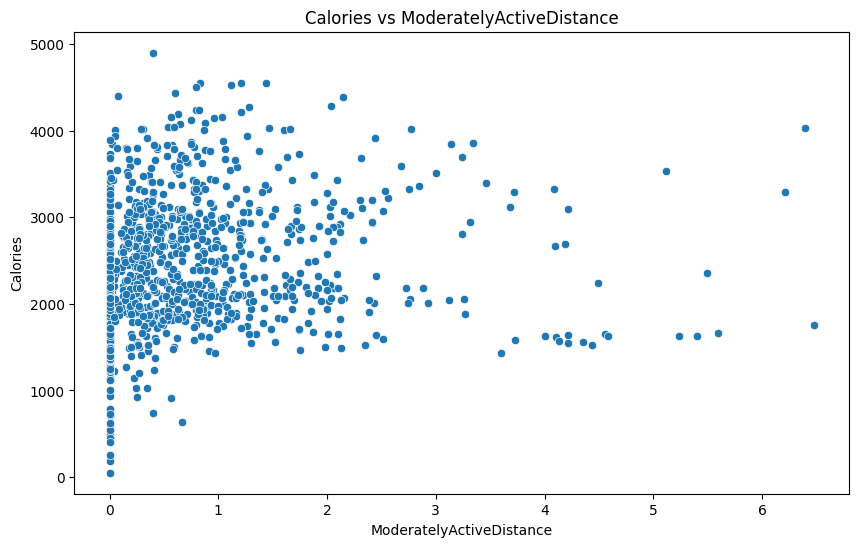

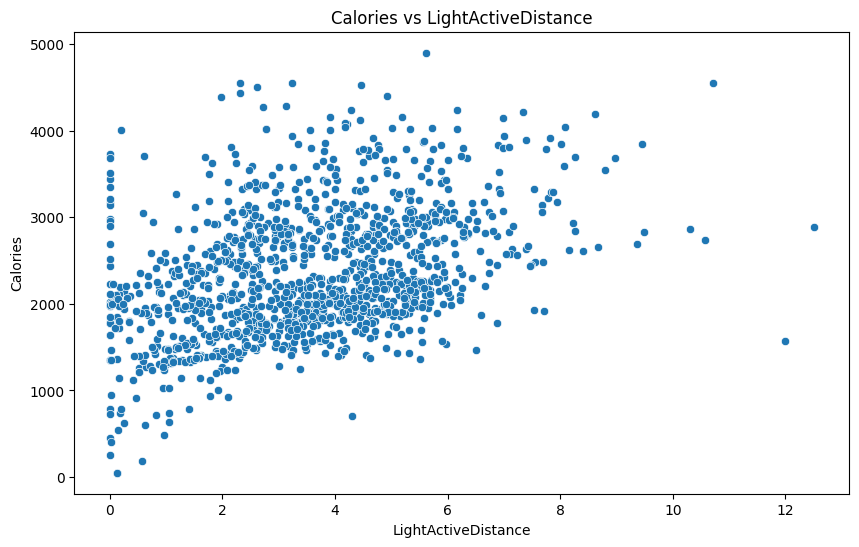

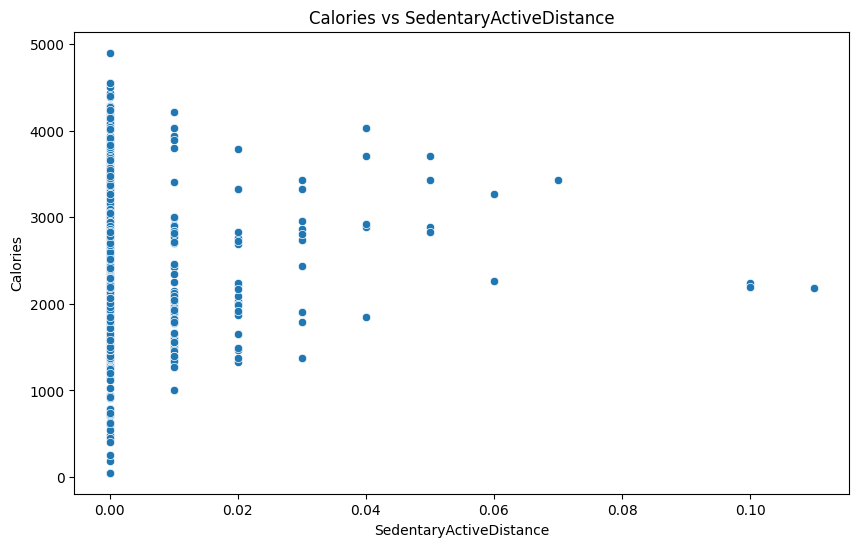

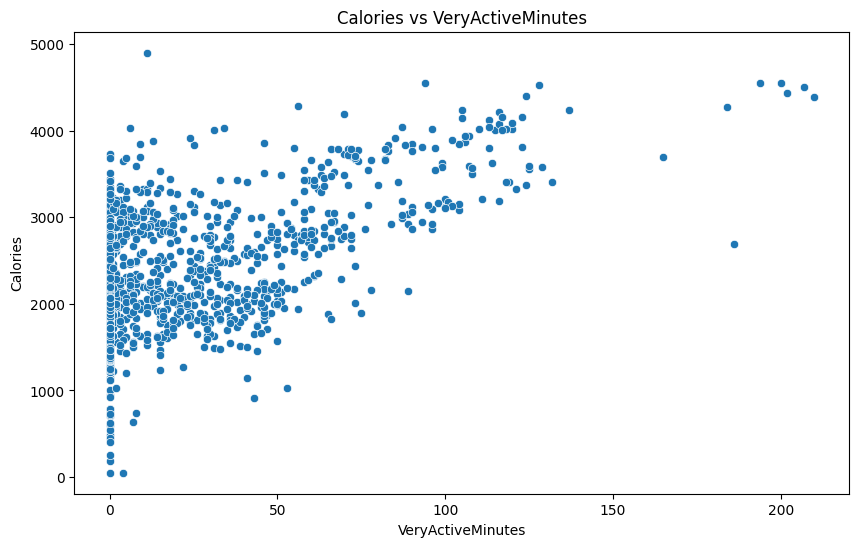

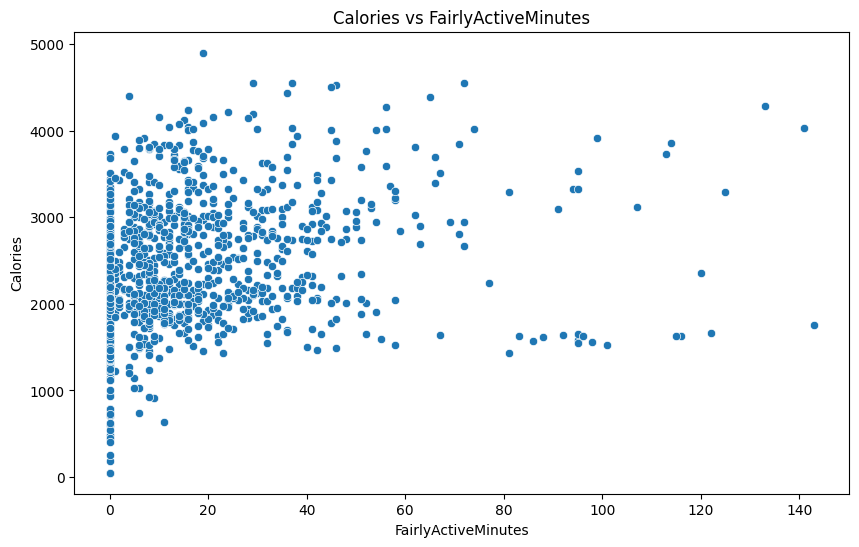

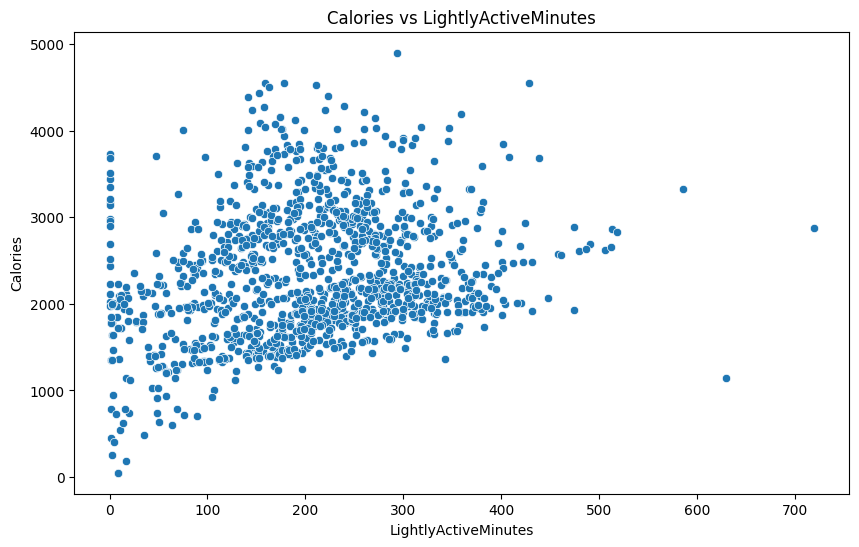

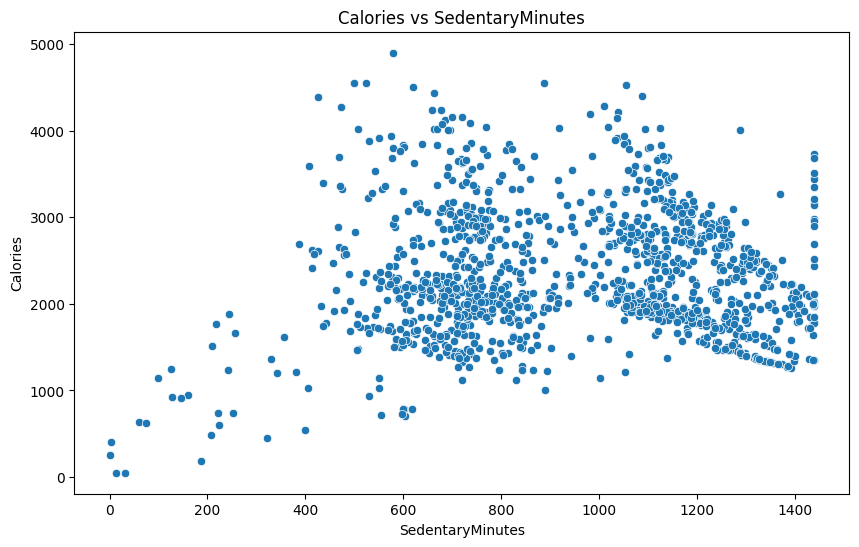

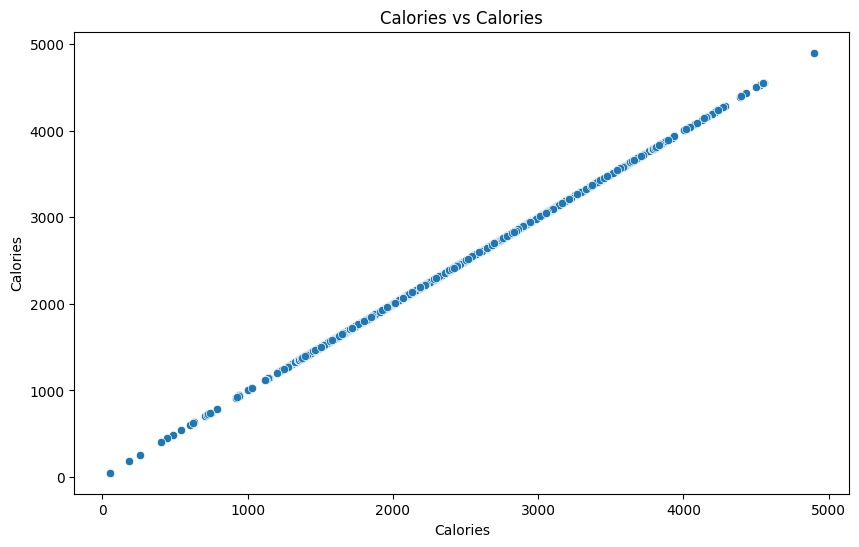

In [123]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

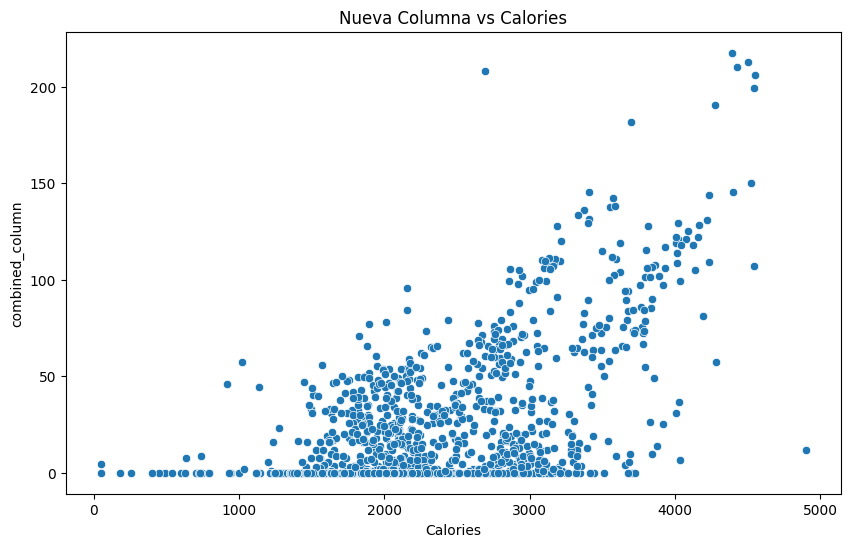

In [124]:
# Combinar column1 y column2 en una nueva columna
df['combined_column'] = df['VeryActiveMinutes'] + df['VeryActiveDistance']

# Trazar combined_column con other_column
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='combined_column', data=df)
plt.title('Nueva Columna vs Calories')
plt.show()

                                Id  TotalSteps  TotalDistance  \
Id                        1.000000    0.206638       0.263963   
TotalSteps                0.206638    1.000000       0.983116   
TotalDistance             0.263963    0.983116       1.000000   
VeryActiveDistance        0.324726    0.751289       0.807552   
ModeratelyActiveDistance  0.033274    0.488835       0.450397   
LightActiveDistance       0.029533    0.643040       0.612177   
SedentaryActiveDistance  -0.018180    0.043926       0.053362   
VeryActiveMinutes         0.329641    0.673252       0.685382   
FairlyActiveMinutes       0.060269    0.472828       0.438145   
LightlyActiveMinutes     -0.103145    0.475313       0.424368   
SedentaryMinutes         -0.047862   -0.164052      -0.133464   
Calories                  0.420672    0.561646       0.616876   
combined_column           0.333294    0.687525       0.703218   

                          VeryActiveDistance  ModeratelyActiveDistance  \
Id             

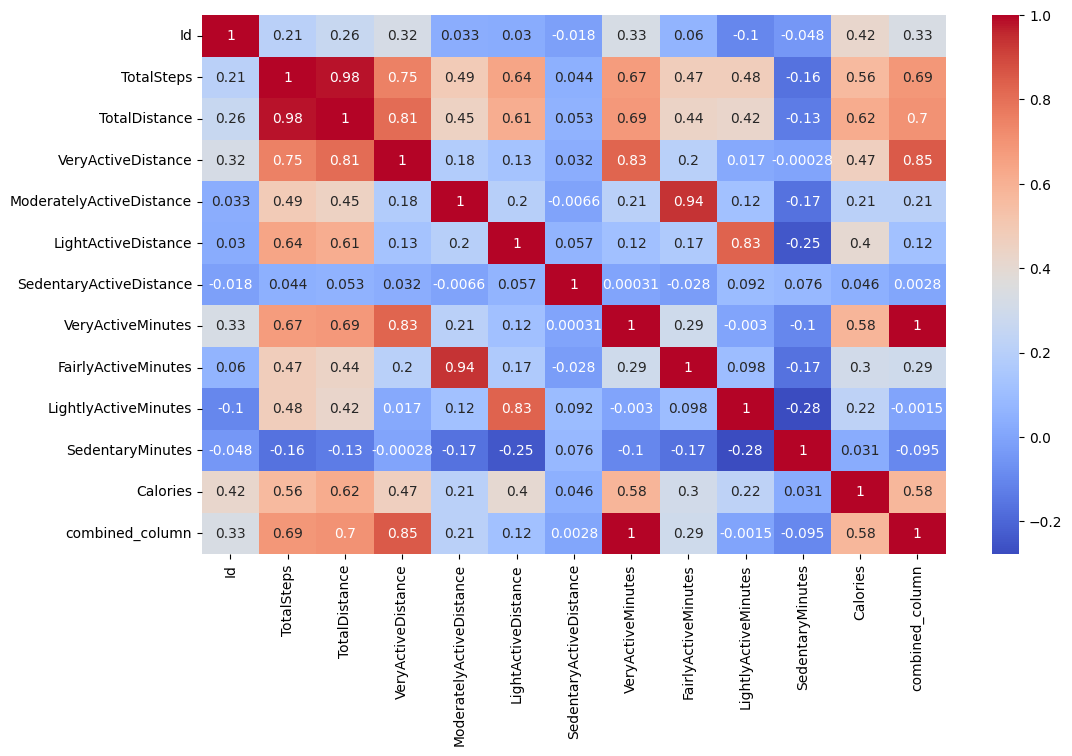

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Suponiendo que 'Date' es el nombre de la columna de fecha
# df1 = df.drop(columns=['ActivityDate'])

correlation_matrix = df.corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [126]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     284.5
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          4.74e-298
Time:                        10:37:44   Log-Likelihood:                -7374.0
No. Observations:                1007   AIC:                         1.477e+04
Df Residuals:                     995   BIC:                         1.483e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [128]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 127603.21276722352
Coeficiente de Determinación R^2: 0.7120055866879662


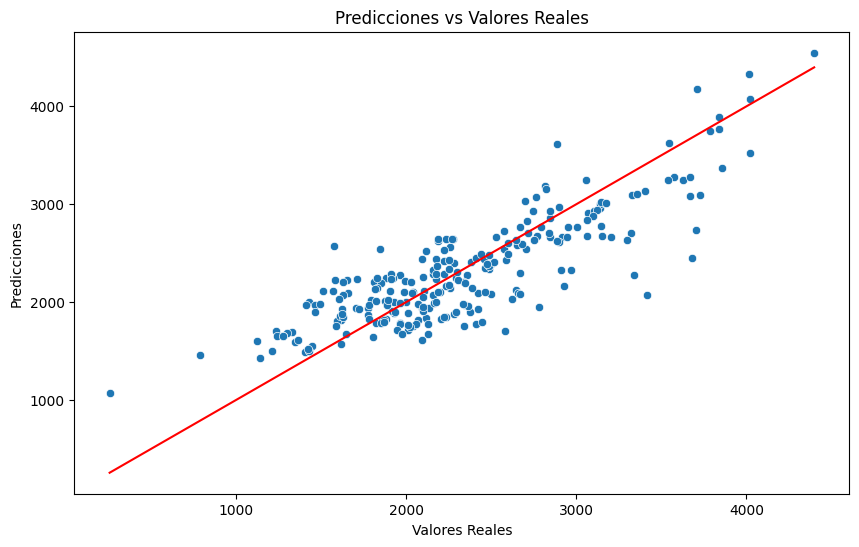

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [130]:
residuos = model.resid

In [131]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: 1.5344720043874573e-10
La media de los residuos es cero.
Suma de los residuos: 1.5452133084181696e-07
La suma de los residuos no es cero.


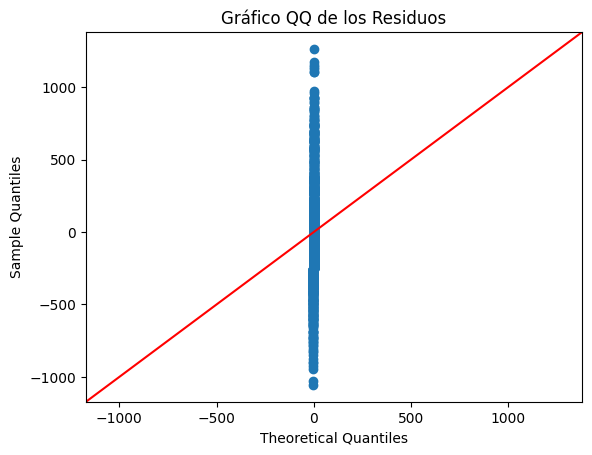

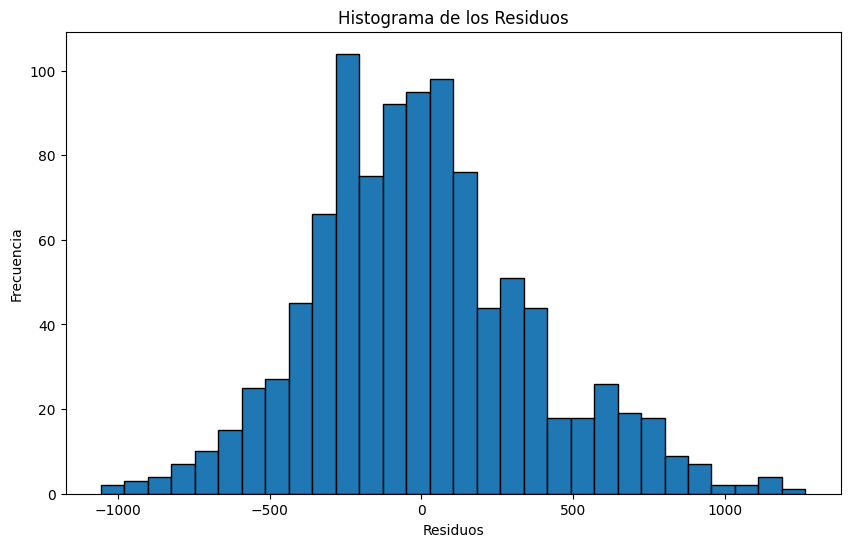

D = 0.5302044335680532, p-value = 1.1503767393612844e-264
Los residuos no parecen estar normalmente distribuidos.


In [132]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

In [133]:
from statsmodels.stats.stattools import durbin_watson

# Realizar el test de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación de la estadística de Durbin-Watson
if 1.5 < dw_stat < 2.5:
    print("No hay autocorrelación en los residuos.")
elif dw_stat < 1.5:
    print("Hay autocorrelación positiva en los residuos.")
else:
    print("Hay autocorrelación negativa en los residuos.")

Estadística de Durbin-Watson: 1.9953367930370867
No hay autocorrelación en los residuos.


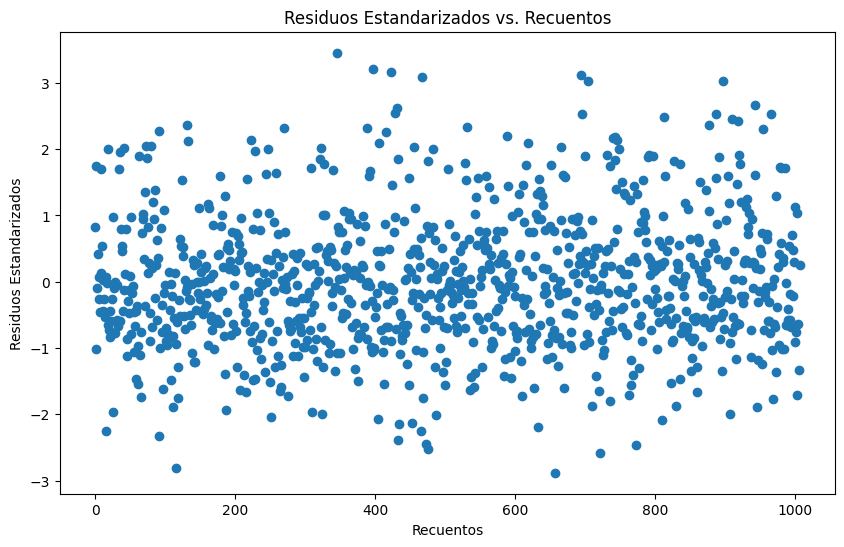

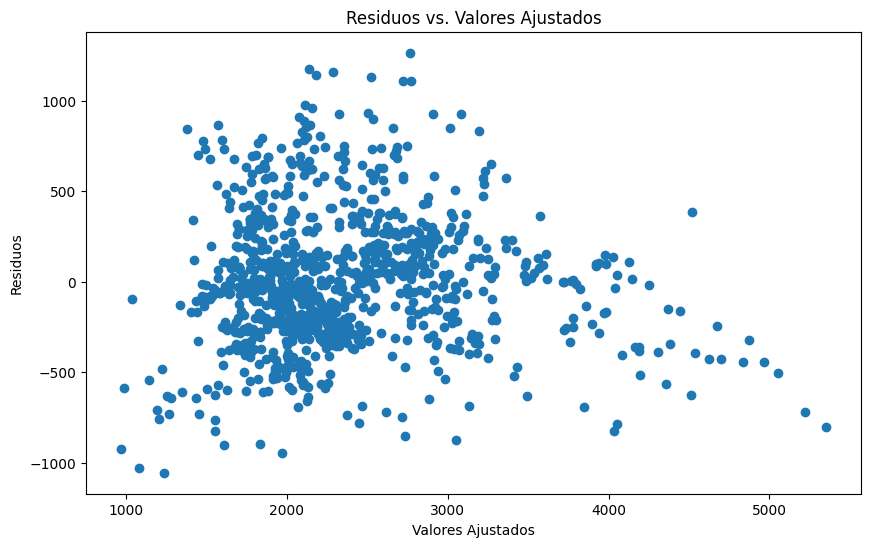

[('Lagrange multiplier statistic', 131.7480274608744), ('p-value', 2.7503314495608647e-22), ('f-value', 13.615745308101708), ('f p-value', 1.5248397234431438e-24)]


In [134]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

In [135]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Predicción por árboles de decisión

In [136]:
from sklearn.tree import DecisionTreeRegressor

# Crear y entrenar el modelo
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Para predecir Calories
predicted_calories = model.predict(X_test)

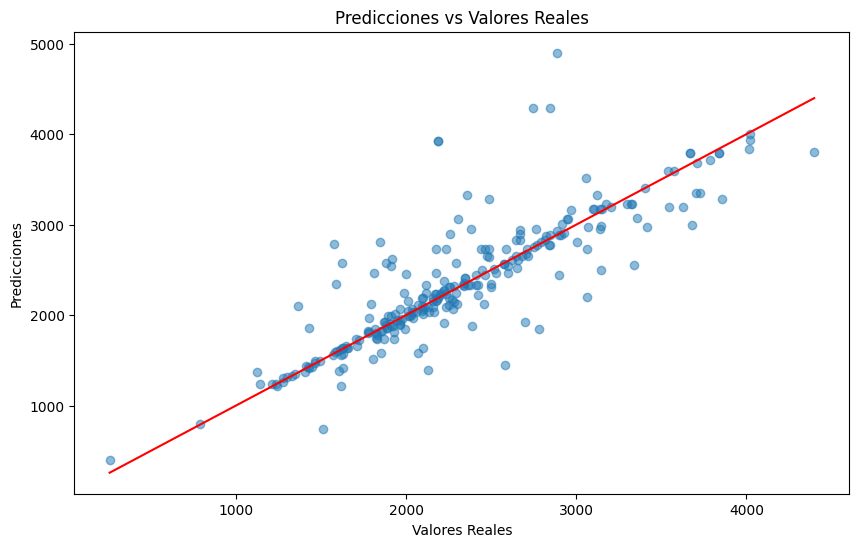

In [137]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_calories, alpha=0.5)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicted_calories)
r2 = r2_score(y_test, predicted_calories)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 143423.59523809524
Coeficiente de Determinación R^2: 0.6762997320369382


### Hipótesis para ANOVA

$H_0$: μ₁ = μ₂ = μ₃ ... = μₖ (donde μ representa los tipos de corredores clasificados (5) según la cantidad de pasos al día que dan).

$H_1$: Al menos una media μ es diferente de las demás.

In [139]:
import pandas as pd

# contruyamos una categoria
min_value = df['TotalSteps'].min()
max_value = df['TotalSteps'].max()
range_size = (max_value - min_value) / 5

# Definir los intervalos y los nombres de las categorías
bins = [min_value, min_value + range_size, min_value + 2*range_size, min_value + 3*range_size, min_value + 4*range_size, max_value]
labels = ['trainer', 'yunior', 'middle', 'athlean', 'pro']

# Crear la nueva columna 'TotalstepsCat'
df['TotalStepsCat'] = pd.cut(df['TotalSteps'], bins=bins, labels=labels)

# Eliminar filas donde 'TotalStepsCat' no tiene valores
df = df.dropna(subset=['TotalStepsCat'])


Utilizando las funciones `f_oneway` y `ols` no solo sabremos si hay diferencias significativas entre las medias de los grupos, sino que además analizaremos la relacion entre las variables **TotalSteps** y **TotalStepsCat** para saber si tiene algún efecto significativo una sobre la otra

In [140]:
# Formacion de los 5 grupos
step1 = []
step2 = []
step3 = []
step4 = []
step5 = []

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    if row['TotalStepsCat'] == 'trainer':
        step1.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'yunior':
        step2.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'middle':
        step3.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'athlean':
        step4.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'pro':
        step5.append(float(row['TotalSteps']))

from scipy.stats import f_oneway
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Realiza la prueba ANOVA
f_stat, p_value = f_oneway(step1, step2, step4, step4, step5)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")


modelo = ols('TotalSteps ~ C(TotalStepsCat)', data=df).fit()
anova_results = sm.stats.anova_lm(modelo, typ=1)

print(anova_results)

F-Statistic: 1287.0698376520343, P-Value: 0.0
                      df        sum_sq       mean_sq            F  PR(>F)
C(TotalStepsCat)     4.0  2.473387e+10  6.183468e+09  1556.333317     0.0
Residual          1252.0  4.974322e+09  3.973100e+06          NaN     NaN


Para más detalles sobre estos grupos utilizaremos la prueba de post-hoc de Turkey, y así obtendremos comparaciones entre los grupos y vemos qué grupos específicos difieren entre sí.

In [141]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realiza la prueba post-hoc de Tukey
tukey_results = pairwise_tukeyhsd(endog=df['TotalSteps'], groups=df['TotalStepsCat'], alpha=0.05)

# Muestra los resultados
print(tukey_results) 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
athlean  middle  -7455.8274   0.0  -9008.6823  -5902.9725   True
athlean     pro   8558.6429   0.0   4442.5266  12674.7591   True
athlean trainer  -20131.263   0.0 -21604.0187 -18658.5073   True
athlean  yunior -13810.6753   0.0 -15283.9887 -12337.3619   True
 middle     pro  16014.4703   0.0  12126.2614  19902.6792   True
 middle trainer -12675.4356   0.0 -13262.6019 -12088.2692   True
 middle  yunior  -6354.8479   0.0  -6943.4117  -5766.2841   True
    pro trainer -28689.9059   0.0 -32546.8242 -24832.9875   True
    pro  yunior -22369.3182   0.0 -26226.4495 -18512.1868   True
trainer  yunior   6320.5877   0.0    5998.007   6643.1684   True
----------------------------------------------------------------


#### Analisis de los resultados de la prueba Tukey

- group1 y group2: Los nombres de los grupos entre los cuales se está haciendo la comparación.
- meandiff: La diferencia entre las medias de los dos grupos.
- p-adj: El valor p ajustado para las comparaciones múltiples. Un valor p bajo (por ejemplo, menor que 0.05) indica que la diferencia en las medias es estadísticamente significativa.
- lower y upper: Los límites del intervalo de confianza para la diferencia entre las medias. Si este intervalo no incluye el 0, sugiere una diferencia significativa entre los grupos.
- reject: Un valor booleano (True/False) que indica si se debe rechazar la hipótesis nula de que las medias de los grupos son iguales. True significa que la diferencia es estadísticamente significativa.

### 1. Poblaciones normales

**Aplicando el test de Kolmogorov-Smirnov**



$H_0$: Los datos siguen una distribución Normal 

$H_1$: Los datos no siguen una distribución Normal 

In [142]:
# Poblaciones normales
from scipy import stats

stat, p = stats.shapiro(step1)

print('Group1 - Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
    print("There is evidence to reject the null hypothesis that the values follow a normal distribution.")
else:
    print("There is not enough evidence to reject the null hypothesis that the values follow a normal distribution.")


Group1 - Shapiro-Wilk Test: Statistics=0.955, p=0.000
There is evidence to reject the null hypothesis that the values follow a normal distribution.


### 2. Homogeneidad de los errores

Test de Levene:

H_0: Igualdad de varianzas (Homocedasticidad)

H_1: Las varianzas son diferentes


In [143]:
# Test de Levene
stat, p = stats.levene(step1, step2, step3, step4, step5)
print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

#test de breusch-pagan
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# Extrae los residuos y las variables independientes (predictores) ajustadas
residuos = modelo.resid
variables_independientes = modelo.model.exog

# Realiza el test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, variables_independientes)

print(f'Valor de estadístico de Lagrange: {bp_test[0]}')
print(f'p-valor del test: {bp_test[1]}')
print(f'Valor del estadístico F: {bp_test[2]}')
print(f'p-valor del test F: {bp_test[3]}')


Levene Test: Statistics=3.139, p=0.014
Valor de estadístico de Lagrange: 12.586206519861241
p-valor del test: 0.013485043221308881
Valor del estadístico F: 3.165733666210317
p-valor del test F: 0.013350894038577676


### Estadístico de Durbin-Watson

Evaluemos la autocorrelación en los residuos de un modelo de regresión lineal. 

$H_0$: No existe correlación entre los residuos.

$H_1$: Los residuos están autocorrelacionados.

In [144]:
from statsmodels.stats.stattools import durbin_watson

# Calcula el estadístico de Durbin-Watson
dw = durbin_watson(modelo.resid)

print(f"Estadístico de Durbin-Watson: {dw}")

alpha =0.5

if 2 - alpha <= dw <= 2 + alpha:
    print("The residuals are uncorrelated.")
elif dw > 2 + 0.5:
    print("There is a positive autocorrelation.")
else:
    print("There is a negative autocorrelation.")

Estadístico de Durbin-Watson: 1.7260635641351405
The residuals are uncorrelated.


# PCA

Aplicando la técnica PCA (Principal Component Analysis) vamos a reducir la dimensionalidad de los datos

In [145]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Primero estandarizamos los datos para asegurarnos de que estaremos trabajando con datos en la misma escala

In [146]:
# Seleccionamos las variables que vamos a analizar
pca_data = df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]


scaler = StandardScaler()
scaled_results = scaler.fit_transform(pca_data)

pca_data.columns

Index(['TotalSteps', 'TotalDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [147]:
# Aplicando PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_results)
print(pca_results)

[[ 0.48686502 -0.07308164]
 [ 3.21706311  0.68300487]
 [ 1.33346966  0.03681973]
 ...
 [ 0.94062577 -0.56184018]
 [ 5.83500412  2.24971866]
 [-0.45341283  0.01398025]]


Se realiza un análisis de los componentes principales y para cada uno de los dos primeros se identifican las cinco características más importantes. Esto se hace tomando el valor absoluto de cada componente principal y seleccionando las cinco características con los valores más altos. Esto es útil porque nos permite entender qué características contribuyen más a cada componente principal.

In [148]:
# Análisis de los componentes principales
principal_components = pd.DataFrame(pca.components_, columns=pca_data.columns)

# Identificar características más importantes para los primeros dos componentes principales
principal_component1 = principal_components.iloc[0]
principal_component2 = principal_components.iloc[1]

# Obtener las características más importantes para el primer componente principal (PC1)
pc1_characteristics = principal_component1.abs().nlargest(5).index
print("Las 5 características más importantes para el primer componente principal (PC1) son:")
for i, characteristic in enumerate(pc1_characteristics, start=1):
    print(f"{i}. {characteristic}")

# Obtener las características más importantes para el segundo componente principal (PC2)
pc2_characteristics = principal_component2.abs().nlargest(5).index
print("\nLas 5 características más importantes para el segundo componente principal (PC2) son:")
for i, characteristic in enumerate(pc2_characteristics, start=1):
    print(f"{i}. {characteristic}")


Las 5 características más importantes para el primer componente principal (PC1) son:
1. TotalSteps
2. TotalDistance
3. VeryActiveDistance
4. VeryActiveMinutes
5. Calories

Las 5 características más importantes para el segundo componente principal (PC2) son:
1. LightlyActiveMinutes
2. LightActiveDistance
3. VeryActiveMinutes
4. VeryActiveDistance
5. SedentaryMinutes


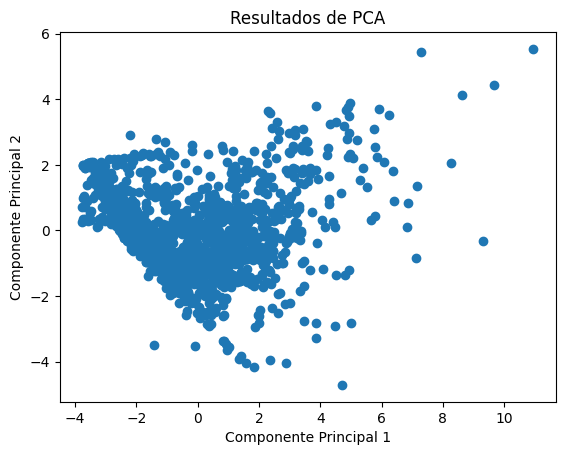

In [149]:
# Visualizar los resultados de PCA
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de PCA')
plt.show()

A través del cálculo de la varianza explicada por cada componente nos da una idea acerca de cuánta variación es capturada por cada componente principal

Varianza explicada:
Componente principal 1: 42.81%
Componente principal 2: 16.49%

Varianza acumulada:
Hasta el componente principal 1: 42.81%
Hasta el componente principal 2: 59.30%


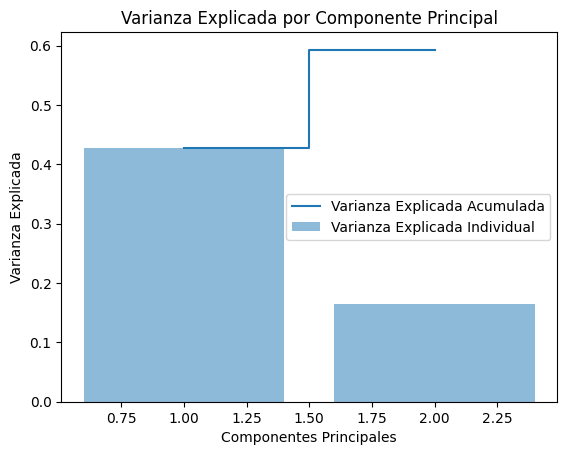

In [150]:
# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
acum_variance = np.cumsum(explained_variance)

print("Varianza explicada:")
for i, varianza in enumerate(explained_variance, start=1):
    print(f"Componente principal {i}: {varianza:.2%}")

print("\nVarianza acumulada:")
for i, varianza_acum in enumerate(acum_variance, start=1):
    print(f"Hasta el componente principal {i}: {varianza_acum:.2%}")

# Visualizar la varianza explicada
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza Explicada Individual')
plt.step(range(1, len(explained_variance) + 1), acum_variance, where='mid', label='Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

Realizamos un análisis de los componentes principales y se visualizamos la importancia de las características en cada componente principal a través de un mapa de calor.

Componentes principales 1 y 2:
  TotalSteps    TotalDistance    VeryActiveDistance    ModeratelyActiveDistance    LightActiveDistance    SedentaryActiveDistance    VeryActiveMinutes    FairlyActiveMinutes    LightlyActiveMinutes    SedentaryMinutes    Calories
------------  ---------------  --------------------  --------------------------  ---------------------  -------------------------  -------------------  ---------------------  ----------------------  ------------------  ----------
   0.444732         0.444473               0.339297                   0.259348                0.286786                  0.0233946             0.335204              0.268106                 0.214049          -0.0986635    0.31573
  -0.0155093        0.0323064              0.381281                  -0.0171034              -0.510309                 -0.0514308             0.381681              0.0283256               -0.585201           0.298673     0.108808


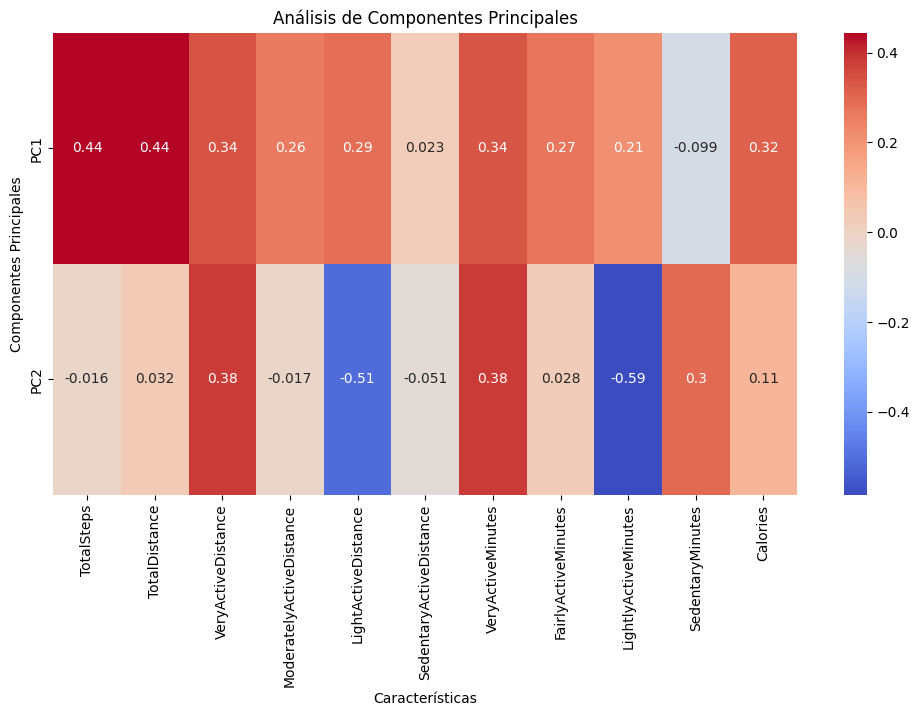

In [151]:
from tabulate import tabulate

# Seleccionar solo los componentes principales 1 y 2
principal_components_1_2 = principal_components.iloc[:2]

# Convertir el DataFrame de componentes principales 1 y 2 en una lista de listas para tabulate
principal_components_1_2_lista = principal_components_1_2.values.tolist()

# Obtener los nombres de las características originales como encabezados de la tabla
encabezados = principal_components_1_2.columns.tolist()

# Imprimir los componentes principales 1 y 2 en forma de tabla
print("Componentes principales 1 y 2:")
print(tabulate(principal_components_1_2_lista, headers=encabezados))

plt.figure(figsize=(12, 6))
sns.heatmap(principal_components, annot=True, cmap='coolwarm', yticklabels=['PC1', 'PC2'], xticklabels=pca_data.columns)
plt.title('Análisis de Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Componentes Principales')
plt.show()
